# Lecture 18: Introduction to Computer Vision

CBIO (CSCI) 4835/6835: Introduction to Computational Biology

## Overview and Objectives

This week, we're moving into image processing. In this lecture, we'll touch on some core concepts around *computer vision*, or the field dedicated to machine understanding of images. By the end of this lecture, you should be able to

 - Read in and display any image using Python
 - Understand the basic components and core data structures of images
 - Describe core image processing techniques such as thresholding, equalization, and autocontrast
 - Recall some of the computer vision packages available in Python for more advanced image processing

## Part 1: Computer Vision

Whenever you hear about or refer to an image analysis task, you've stepped firmly into territory occupied by *computer vision*, or the field of research associated with understanding images and designing algorithms to do the same.

![computer-vision1](ComputerVision/computer-vision1.jpg)

### Examples of Computer Vision

You can probably name numerous examples of computer vision already, but just to highlight a couple:

![facebook](ComputerVision/Facebook-facial-recognition-main.jpg)

 - Facebook and Google use sophisticated computer vision methods to perform facial recognition scans of photos that are uploaded to their servers. You've likely seen examples of this when Facebook automatically puts boxes around the faces of people in a picture, and asks if you'd like to tag certain individuals.

![tesla](ComputerVision/tesla-model-s-autopilot-sensors.jpg)

 - Tesla Motors' "Autopilot" and other semi-autonomous vehicles use arrays of cameras to capture outside information, then process these photos using computer vision methods in order to pilot the vehicle. Google's experimental self-driving cars use similar techniques, but are fully autonomous.

![oscars](ComputerVision/25CCD2F400000578-2958597-image-a-27_1424270103152.jpg)

 - The subarea of machine learning known as "deep learning" has exploded in the last five years, resulting in state-of-the-art image recognition capabilities. Google's DeepMind can recognize arbitrary images to an extraordinary degree, and similar deep learning methods have been used to automatically generate captions for these images.

This is all to underscore: **computer vision is an extremely active area of research and application!**

 - Automated categorization and annotation of YouTube videos (identification of illegal content?)

 - Analyzing photos on your smartphones

 - License plate and facial recognition for law enforcement officials

 - Disabled access to web technologies

 - Virtual reality

### Images and their Representations

From the perspective of the computer, the simplest constituent of an image is a pixel.

 - *pix*: picture
 - *el*: element
 
A *pixel* is a *picture element*.

 - In a **grayscale** image, the pixel contains the **intensity**. Depending on the image format this may range from 0-1, 0-255, or be any floating point number.

 - In a **color** image, a pixel is (usually) a triple (red, green, blue) of color values where each color intensity ranges from 0-255 (24-bit color).

(There are *many* other image formats and representations, but they tend to be variations on this theme)

In either grayscale or color, the pixels are arranged in rectangular arrays, one for each color channel (1 for grayscale, 3 for RGB).

![chdata](ComputerVision/ch_data5.png)

(What could these arrays *possibly* be in Python?)

## Part 2: Loading and Manipulating Images

Let's jump in and get our hands dirty! First, let's use a relevant image:

![image1](ComputerVision/image1.png)

 - <font color="red">Actin</font>
 - <font color="green">HSP27</font>
 - <font color="blue">DAPI</font>

I've stored this image in the course GitHub repository under `lectures/ComputerVision` ( https://github.com/eds-uga/cbio4835-fa18 ) if you're interested.

Here's how to load the images in Python:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Loads the image (just like a text file!)
img = mpimg.imread("ComputerVision/image1.png")

print(type(img))

<class 'numpy.ndarray'>


Just a regular NumPy array!

Let's see if we can visualize it.

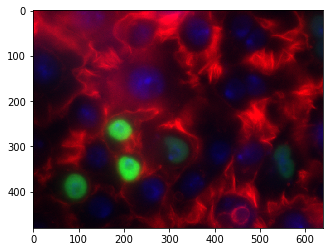

In [3]:
plt.imshow(img)

This shows the whole image, all three channels.

In [4]:
print(img.shape)

(480, 640, 3)


As evidenced by the `.shape` property of the NumPy array, there are *three* dimensions to this image:

 - the first is height (or rows)
 - the second is width (or columns)
 - the third is *color* (or depth)

Each slice of the third dimension is a color channel, of which there are 3: one for red, one for green, and one for blue (hence: RGB).

We can plot them separately!

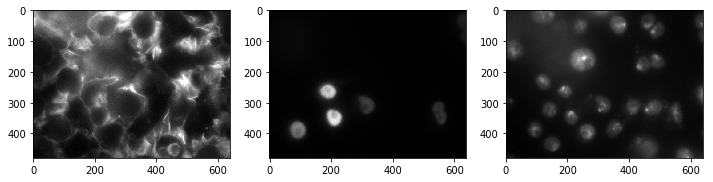

In [5]:
# First, separate out the channels.
r = img[:, :, 0]
g = img[:, :, 1]
b = img[:, :, 2]

# Now, plot each channel separately.
f = plt.figure(figsize = (12, 6))
f.add_subplot(1, 3, 1)
plt.imshow(np.array(r), cmap = "gray") 
f.add_subplot(1, 3, 2)
plt.imshow(np.array(g), cmap = "gray")
f.add_subplot(1, 3, 3)
plt.imshow(np.array(b), cmap = "gray")

Image analysis of any kind is usually done on a single channel.

Since images are stored as NumPy arrays, all the usual NumPy functionality (besides slicing, as we saw earlier) is available to you.

 - Want to compute the maximum and minimum pixel values in the images?

In [6]:
print(np.max(img))
print(np.min(img))

1.0
0.0


 - Want to compute the average and median pixel values?

In [7]:
print(np.mean(img))
print(np.median(img))

0.13152441
0.07058824


 - How about the median of each of the red, green, and blue channels separately?

In [8]:
print(np.median(r))
print(np.median(g))
print(np.median(b))

0.20784314
0.007843138
0.07450981


### Converting Image Types

Recall that our `img` object was loaded from a PNG image; this is the only format type that Matplotlib natively supports (more on that later).

When you read an image into Python, it will automatically detect the format and read it into the closest approximate Python data format it can. However, you can always manually convert it once it's in Python.

For instance, we use a slightly different approach to instead read in our image as grayscale:

In [9]:
import scipy.ndimage as ndimg

img_gray = ndimg.imread("ComputerVision/image1.png", flatten = True)  # The "flatten" arg is critical
print(img_gray.shape)

(480, 640)


/opt/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Note how there are only 2 dimensions now--just a height and width.

There is no need for a 3rd dimension because there's only 1 channel: luminescence, or grayscale intensity.

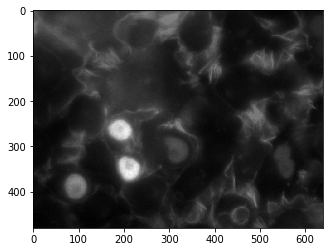

In [10]:
plt.imshow(img_gray, cmap = "gray")

We can access individual pixels, just as you would individual elements of a matrix NumPy array (because that's all it is):

In [11]:
print(img_gray[100, 200])

35.139


In [12]:
print(img_gray[150, :])

[11.606 12.503 11.279 11.692 11.692 11.621 12.208 13.034 12.518 12.023
 12.148 11.436 12.148 12.023 11.963 12.479 13.305 12.892 12.821 12.935
 14.43  12.967 13.576 13.206 13.178 13.662 14.26  14.63  13.733 15.402
 13.619 13.75  13.576 14.718 14.305 12.593 11.468 12.909 13.806 12.909
 12.98  13.578 12.752 12.823 11.513 13.41  11.926 12.812 13.068 12.78
 11.769 11.829 13.21  12.808 12.982 11.911 12.384 13.053 13.053 13.961
 13.064 14.858 15.146 17.549 18.435 16.527 17.054 16.228 18.136 17.848
 17.239 17.609 18.136 18.136 15.929 18.435 15.929 17.239 16.94  16.342
 17.125 16.527 15.755 19.631 17.538 18.25  18.848 18.549 20.044 21.539
 22.436 21.849 24.643 27.334 29.911 33.613 37.201 38.984 34.923 37.614
 36.119 36.407 35.336 36.005 36.532 34.749 35.222 35.934 33.841 34.151
 36.244 36.646 36.956 38.554 39.647 37.853 40.06  41.854 41.854 43.833
 43.278 40.245 41.854 39.288 39.576 41.185 36.7   37.184 39.092 36.928
 37.412 35.917 36.216 33.949 34.846 34.547 33.949 34.351 32.878 34.362
 34.96 

In [13]:
print(np.max(img_gray[:, 400]))

78.428


If you so desire, you can even modify the pixel values directly, again just as you would for a regular NumPy array.

Fair warning: doing this alters the image! You may want to copy the image structure first...

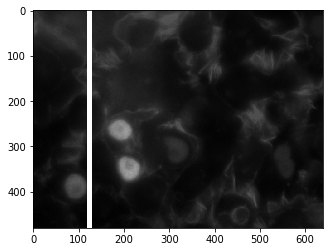

In [14]:
for i in range(img_gray.shape[0]):
    for j in range(120, 130):
        img_gray[i, j] = 255

plt.imshow(img_gray, cmap = "gray")

### Histograms

Another very useful way of obtaining information about an image is to view the histogram of pixel values.

You can do this regardless of whether it's a grayscale or RGB image, though in the latter case it's useful to plot the pixel values separated by channel.

First, let's re-import the image as grayscale and take a look at how the pixel values show up in a histogram:

/opt/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.


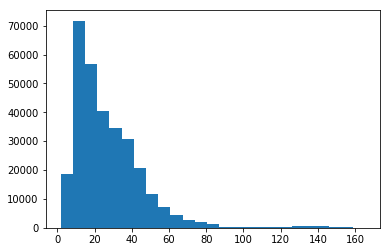

In [15]:
img_gray = ndimg.imread("ComputerVision/image1.png", flatten = True)
_ = plt.hist(img_gray.flatten(), bins = 25)

This tells us some very useful information--primarily, that most of the pixel values are centered around what seems like a pretty low number (20-30), so by and large the image is very dark (which we saw).

There do seem to be a few light spots on an island around 120-140, but that's it.

Let's take a look now at each channel individually. 

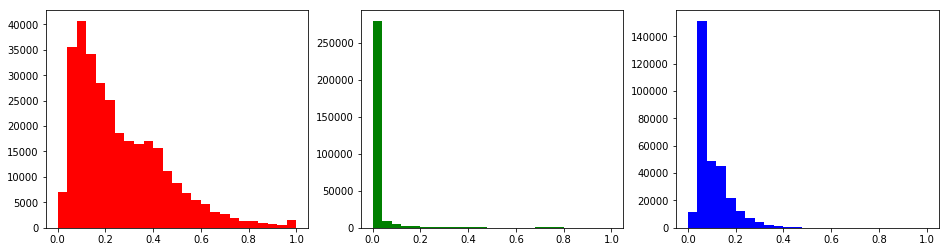

In [16]:
fig = plt.figure(figsize = (16, 4))
plt.subplot(131)
_ = plt.hist(r.flatten(), bins = 25, range = (0, 1), color = 'r')
plt.subplot(132)
_ = plt.hist(g.flatten(), bins = 25, range = (0, 1), color = 'g')
plt.subplot(133)
_ = plt.hist(b.flatten(), bins = 25, range = (0, 1), color = 'b')

Recall what each channel represented:

 - <font color="red">Actin</font>
 - <font color="green">HSP27</font>
 - <font color="blue">DAPI</font>

There seems to be very little HSP27, while there is tons of actin and the quantity of DAPI falls somewhere in between.

...oh wait, did you see the scales for each one?

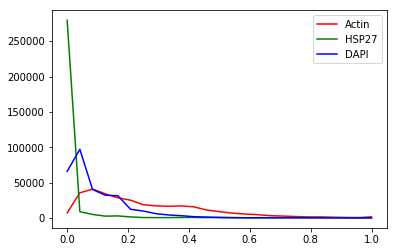

In [17]:
x = np.linspace(0, 1, 25)
plt.plot(x, np.histogram(r.flatten(), bins = 25)[0], color = 'r', label = 'Actin')
plt.plot(x, np.histogram(g.flatten(), bins = 25)[0], color = 'g', label = 'HSP27')
plt.plot(x, np.histogram(b.flatten(), bins = 25)[0], color = 'b', label = 'DAPI')
plt.legend()

So, yes:

 - Clearly, very little HSP27 signal, relative to the other stains. Most of those pixels are black (0).

 - There does seem to be a decent amount of DAPI signal, but like HSP27 it too drops off very quickly; not many DAPI pixels with brightness greater than 0.4 or so.

 - The actin signal is probably the most interesting one, in that it's very diffuse--very few black (0) pixels, no white pixels either (1), but somewhere in between for the most part. This is fairly characteristic for actin.

### Equalization

While we're on the topic of histograms, there is a convenient way to try and "reshape" the pixel histograms so as to make the resulting image a bit sharper. This is called *histogram equalization*.

The idea is simple enough: re-map the pixel values in the image so that the corresponding histogram is perfectly flat.

Basically it tries to fill in the "valleys" and flatten the "peaks" of the pixel histograms we saw earlier--this has the effect of bringing out very dim signal and dampening oversaturated signal.

Let's see an example, using one of the image channels.

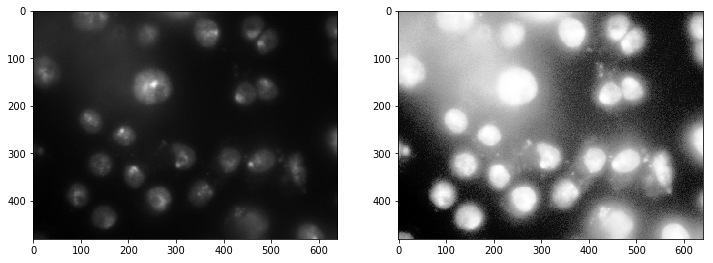

In [18]:
from PIL import Image, ImageOps

img_pil = Image.open("ComputerVision/image1.png")
beq = ImageOps.equalize(img_pil.split()[2])

f = plt.figure(figsize = (12, 6))
f.add_subplot(1, 2, 1)
plt.imshow(b, cmap = 'gray')
f.add_subplot(1, 2, 2)
plt.imshow(np.array(beq), cmap = 'gray')

We can directly see why these two images look different (and, specifically, what histogram equalization did) by recomputing the channel histograms:

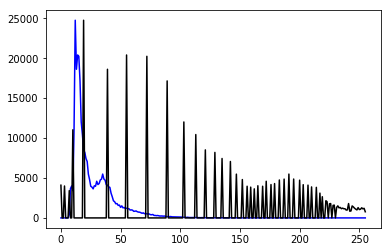

In [19]:
plt.plot(img_pil.split()[2].histogram(), 'b')
plt.plot(beq.histogram(), 'k')

### Autocontrast

Autocontrast is another tool that modifies the pixel histograms to try and make the resulting images more viewable. In this case, the goal of autocontrast is to maximize (normalize) image contrast.

This function calculates a histogram of the input image, removes cutoff percent of the lightest and darkest pixels from the histogram, and remaps the image so that the darkest remaining pixel becomes black (0), and the lightest becomes white (255).

In essence, you choose some percentage cut-off (say: 50%, or 0.5), removes that fraction of pixels that are both darkest and lightest (assumes they're noise and throws them away), then remaps the remaining pixels.

Here's what it might look like:

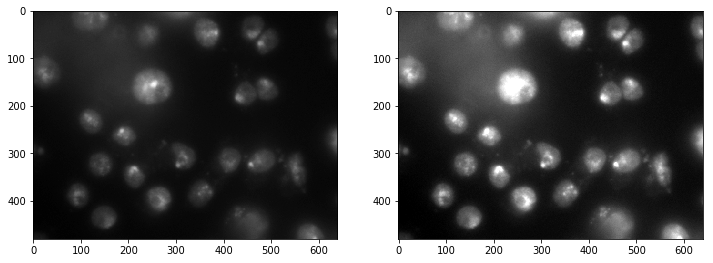

In [20]:
bcon = ImageOps.autocontrast(img_pil.split()[2], 0.5)

f = plt.figure(figsize = (12, 6))
f.add_subplot(1, 2, 1)
plt.imshow(b, cmap = "gray")
f.add_subplot(1, 2, 2)
plt.imshow(np.array(bcon), cmap = "gray")

In this case, we're trying to chop off pixel values at both ends of the histogram (lightest and darkest) and reshuffling the others around to make them more visible, hopefully improving contrast.

The effects on the underlying histograms look like:

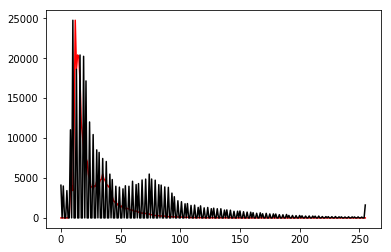

In [21]:
plt.plot(img_pil.split()[2].histogram(), 'r')
plt.plot(bcon.histogram(), 'k')

It closely mimics the original histogram, but because some values at the tails were thrown away, all the other values were reshuffled--you end up with more pixels some of the middle values, which is (presumably) the signal you're interested in.

### Thresholding

Thresholding is the process by which you define a pixel threshold--say, the value 100--and set every pixel *below* that value to 0, and every pixel *above* that value to 255.

In doing so, you *binarize* the image, as each pixel takes on only one of two possible values.

Remember [boolean indexing](https://eds-uga.github.io/cbio4835-fa18/slides/Lecture6.slides.html)?

(head on over to Lecture 6 if you're a little fuzzy on the details)

In short, you can create *masks* based on certain boolean conditions so you can modify certain parts of the array while holding the others constant.

Here's the example straight from the lecture:

In [22]:
x = np.random.standard_normal(size = (7, 4))
print(x)

[[ 0.52596627 -2.88941486  0.09271166 -0.21067344]
 [-0.12179478 -1.05645342 -0.12380148 -0.24558527]
 [-0.27362056  0.03955863  1.46031891 -0.59451959]
 [-0.54946308  0.11931622 -0.89393382 -0.37672314]
 [ 0.23949055  1.17503008  1.25029635 -0.54126771]
 [-1.38006784 -1.45153849  1.57108929  0.21122822]
 [ 0.32417432 -0.51411142  0.34512795  0.07949588]]


If we just want the positive numbers, we can define a *mask* using the condition you'd find in an `if` statement:

In [23]:
mask = x < 0  # For every element of x, ask: is it < 0?
print(mask)

[[False  True False  True]
 [ True  True  True  True]
 [ True False False  True]
 [ True False  True  True]
 [False False False  True]
 [ True  True False False]
 [False  True False False]]


The mask is just a bunch of `True` and `False` values.

Now we can use the mask to modify the parts of the original array that correspond to `True` in the mask:

In [24]:
x[mask] = 0.0
print(x)

[[0.52596627 0.         0.09271166 0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.03955863 1.46031891 0.        ]
 [0.         0.11931622 0.         0.        ]
 [0.23949055 1.17503008 1.25029635 0.        ]
 [0.         0.         1.57108929 0.21122822]
 [0.32417432 0.         0.34512795 0.07949588]]


Back to images! Let's use a threshold on our blue channel:

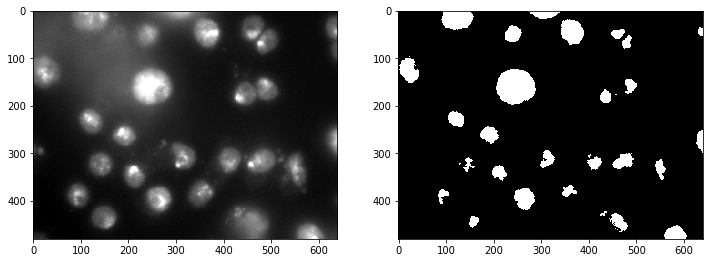

In [25]:
b_thresh = np.array(bcon) > 120  # Every pixel greater than 120 is "True", otherwise it's "False"

f = plt.figure(figsize = (12, 6))
f.add_subplot(1, 2, 1)
plt.imshow(np.array(bcon), cmap = "gray")
f.add_subplot(1, 2, 2)
plt.imshow(b_thresh, cmap = "gray")

Any ideas how we might, say, count the number of cells?

## Part 3: Computer Vision in Python

There is an entire ecosystem of computer vision packages for Python.

Some are very general (a lot like `scipy.ndimage` and `PIL`) while some are very specific to certain classes of problems.

You could spend an entire career with just one or two of these packages, but very briefly I'll name a few of the most popular.

(We'll make use of some of them!)

### `scikit-image`

![scikitimage](ComputerVision/logo.png)

If `scipy.ndimage` or `PIL` proves to be insufficient for your needs, this should be the first stop you take in looking for alternatives.

It has a wealth of general-purpose image processing routines built-in. It's actively developed and very easy to use, and integrates well with NumPy and SciPy.

It also comes with a bunch of basic tutorials and sample data to help you get your feet wet.

### `mahotas`

This is another excellent general-purpose image processing library, though it has a slight preference for bio-imaging applications. After all, its author is a computational biologist!

Like `scikit-image`, it's actively developed, easy to use, and integrates fully with the NumPy + SciPy scientific computing environment for Python.

This is probably your first stop if you're looking for some basic bioimaging tools.

### OpenCV

![opencv](ComputerVision/logoweblarge640_480.png)

OpenCV (for "Open Computer Vision") is the Grand Daddy of image processing packages.

You'll want to use this if computer vision is a significant part of your day-to-day career. It's not for the faint of heart, however: it's a C++ library with Python bindings, which means you have to install from source, and that can be painful depending on how (un)comfortable you are with compiling things from scratch.

(though if you use the Anaconda distribution of Python, and you connect it to the conda-forge channel, you can download pre-built OpenCV packages that WAY SIMPLIFY this process)

That said, OpenCV has everything: 

 - automated image segmentation
 - facial recognition
 - video stabilization
 - optical flow algorithms
 - image stitching
 - filtering
 - warping
 - matching
 - deep learning
 - ...
 
The list goes on and on.

It's well-maintained, well-documented, and while it can be a little tricky to use, it has a huge community of developers and users ready to help.

Like `scikit-image`, it also provides a ton of tutorials for typical use-cases, though OpenCV's definition of "typical" is a little different: they're actually pretty in-depth!

## Administrivia

 - Assignment 4 is **due today!**

 - Project proposals are also **due today!**

## Additional Resources



 - Matplotlib image tutorial http://matplotlib.org/users/image_tutorial.html
 - scikit-image http://scikit-image.org/
 - mahotas http://mahotas.readthedocs.io/en/latest/
 - OpenCV http://opencv.org/
 - OpenCV Python tutorials http://docs.opencv.org/3.2.0/d6/d00/tutorial_py_root.html